# UK SALARY ANALYTICS PROJECT

In [35]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set(style="whitegrid")
pd.set_option("display.max_columns", None)


In [86]:
os.getcwd()

'C:\\Users\\HP\\OneDrive\\Music\\Documents\\Toluwani Oyeniran_Data_Project\\UK Salary Data'

In [84]:
df=pd.read_csv('uk_salary.csv')



In [39]:
df.head()

,occupation,region,sex,pay_annual,pay_hourly,work_pattern,year,age_group,sector
0,Mechanical Engineer,Scotland,Male,55181.49,30.66,Full-time,2024,40-49,Public Sector
1,Mechanical Engineer,North East,Male,58873.23,32.71,Full-time,2024,40-49,Education
2,Data Analyst,West Midlands,Female,49161.49,27.31,Full-time,2024,30-39,Retail
3,Police Officer,Northern Ireland,Female,25141.38,13.97,Part-time,2024,50-59,Retail
4,Police Officer,North West,Male,39686.57,22.05,Full-time,2024,40-49,Construction


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   occupation    300 non-null    object 
 1   region        300 non-null    object 
 2   sex           300 non-null    object 
 3   pay_annual    300 non-null    float64
 4   pay_hourly    300 non-null    float64
 5   work_pattern  300 non-null    object 
 6   year          300 non-null    int64  
 7   age_group     300 non-null    object 
 8   sector        300 non-null    object 
dtypes: float64(2), int64(1), object(6)
memory usage: 21.2+ KB


In [41]:
df.isnull().sum()

occupation      0
region          0
sex             0
pay_annual      0
pay_hourly      0
work_pattern    0
year            0
age_group       0
sector          0
dtype: int64

In [42]:
df.duplicated().sum()

0

In [43]:
df.describe(include='all')

,occupation,region,sex,pay_annual,pay_hourly,work_pattern,year,age_group,sector
count,300,300,300,300.000000,300.000000,300,300.0,300,300
unique,17,10,2,NaN,NaN,2,NaN,4,8
top,Business Analyst,South East,Male,NaN,NaN,Full-time,NaN,50-59,Construction
freq,31,36,155,NaN,NaN,155,NaN,90,41
mean,NaN,NaN,NaN,37465.398467,20.814233,NaN,2024.0,NaN,NaN
std,NaN,NaN,NaN,16270.770475,9.039265,NaN,0.0,NaN,NaN
min,NaN,NaN,NaN,7152.230000,3.970000,NaN,2024.0,NaN,NaN
25%,NaN,NaN,NaN,24331.680000,13.517500,NaN,2024.0,NaN,NaN
50%,NaN,NaN,NaN,35712.350000,19.840000,NaN,2024.0,NaN,NaN
75%,NaN,NaN,NaN,48285.665000,26.822500,NaN,2024.0,NaN,NaN


In [44]:
df['age_group']

0      40-49
1      40-49
2      30-39
3      50-59
4      40-49
       ...  
295    50-59
296    40-49
297    30-39
298    18-29
299    30-39
Name: age_group, Length: 300, dtype: object

In [46]:
df.head(10)

,occupation,region,sex,pay_annual,pay_hourly,work_pattern,year,age_group,sector
0,Mechanical Engineer,Scotland,Male,55181.49,30.66,Full-time,2024,40-49,Public Sector
1,Mechanical Engineer,North East,Male,58873.23,32.71,Full-time,2024,40-49,Education
2,Data Analyst,West Midlands,Female,49161.49,27.31,Full-time,2024,30-39,Retail
3,Police Officer,Northern Ireland,Female,25141.38,13.97,Part-time,2024,50-59,Retail
4,Police Officer,North West,Male,39686.57,22.05,Full-time,2024,40-49,Construction
5,HR Manager,South West,Female,47851.19,26.58,Full-time,2024,50-59,Public Sector
6,Project Manager,South West,Male,35497.96,19.72,Full-time,2024,18-29,Construction
7,Accountant,South East,Female,38124.39,21.18,Full-time,2024,30-39,Retail
8,IT Manager,East Midlands,Female,60925.87,33.85,Full-time,2024,50-59,Construction
9,Business Analyst,Scotland,Female,25292.20,14.05,Part-time,2024,50-59,Technology


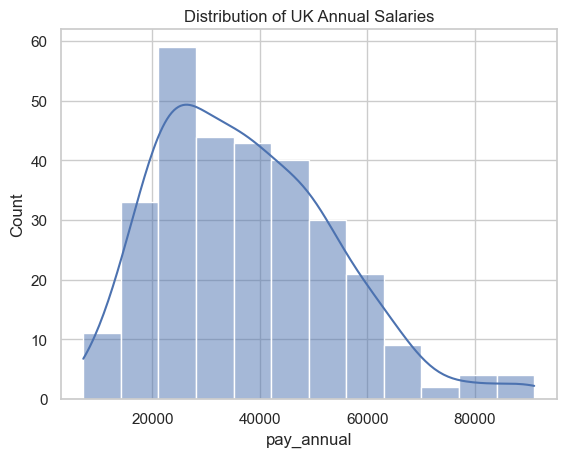

In [47]:
sns.histplot(df["pay_annual"], kde=True)
plt.title("Distribution of UK Annual Salaries")
plt.show()

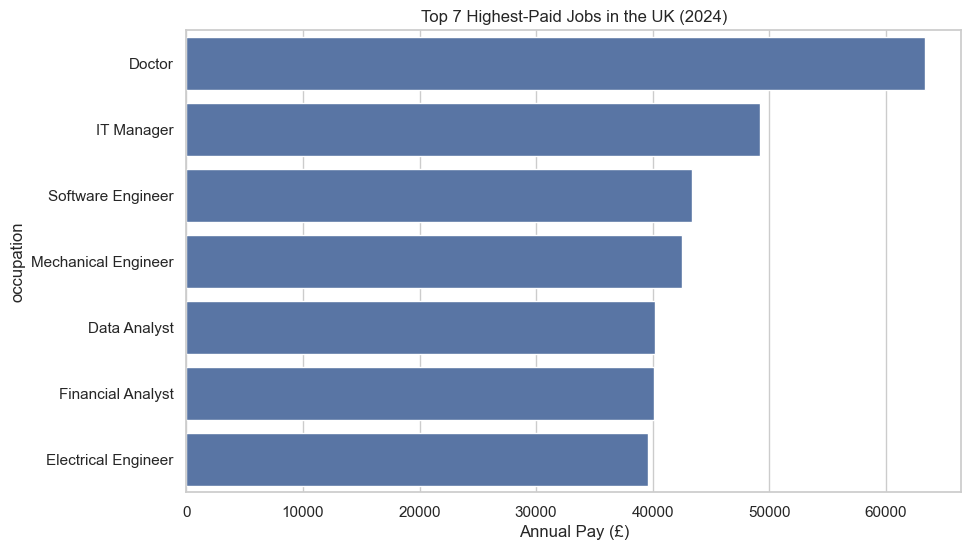

In [82]:
top_jobs = df.groupby("occupation") ["pay_annual"]. mean().sort_values(ascending=False). head(7)

plt.figure(figsize=(10,6))
sns.barplot(x=top_jobs.values, y=top_jobs.index)
plt.title("Top 7 Highest-Paid Jobs in the UK (2024)")
plt.xlabel("Annual Pay (£)")
plt.show()

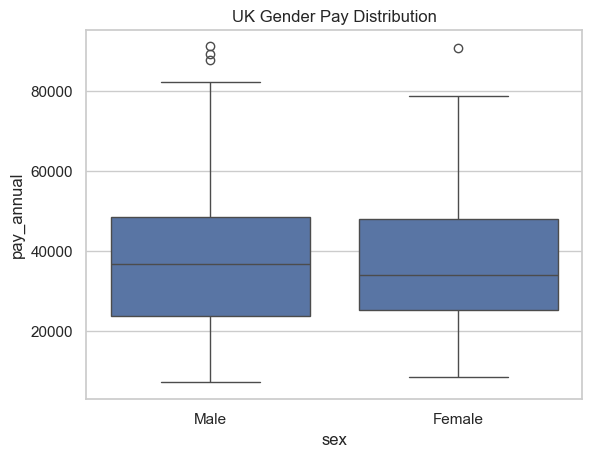

In [49]:
sns.boxplot(x="sex", y="pay_annual", data=df)
plt.title("UK Gender Pay Distribution")
plt.show()

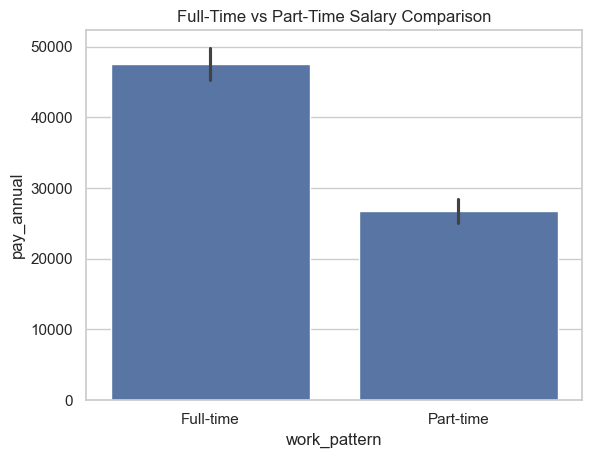

In [50]:
sns.barplot(x="work_pattern", y="pay_annual", data=df)
plt.title("Full-Time vs Part-Time Salary Comparison")
plt.show()

In [51]:
df["salary_band"] = pd.qcut(
    df["pay_annual"],
    q=4,
    labels=["Low", "Lower-Middle", "Upper-Middle", "High"]
)

In [55]:
df[['salary_band','pay_annual']].head(10)

,salary_band,pay_annual
0,High,55181.49
1,High,58873.23
2,High,49161.49
3,Lower-Middle,25141.38
4,Upper-Middle,39686.57
5,Upper-Middle,47851.19
6,Lower-Middle,35497.96
7,Upper-Middle,38124.39
8,High,60925.87
9,Lower-Middle,25292.20


In [56]:
def exp_level(age):
    if "18-29" in age:
        return "Junior"
    elif "30-39" in age:
        return "Mid-Level"
    elif "40-49" in age:
        return "Senior"
    else:
        return "Expert"

df["experience_level"] = df["age_group"].apply(exp_level)

In [58]:
df[['age_group','experience_level']].head(10)

,age_group,experience_level
0,40-49,Senior
1,40-49,Senior
2,30-39,Mid-Level
3,50-59,Expert
4,40-49,Senior
5,50-59,Expert
6,18-29,Junior
7,30-39,Mid-Level
8,50-59,Expert
9,50-59,Expert


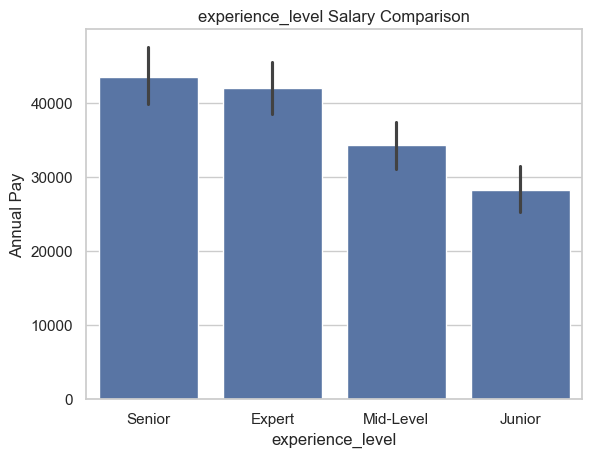

In [59]:
# Sort the DataFrame by average pay per age_category
age_salary_order = df.groupby('experience_level')['pay_annual'].mean().sort_values(ascending=False).index

# Plot with age_category in ascending order of pay
sns. barplot(
    x="experience_level", 
    y="pay_annual", 
    data=df,
    order=age_salary_order  # ensure ascending order
)

plt.title("experience_level Salary Comparison")
plt.xlabel("experience_level")
plt.ylabel("Annual Pay")
plt.show()

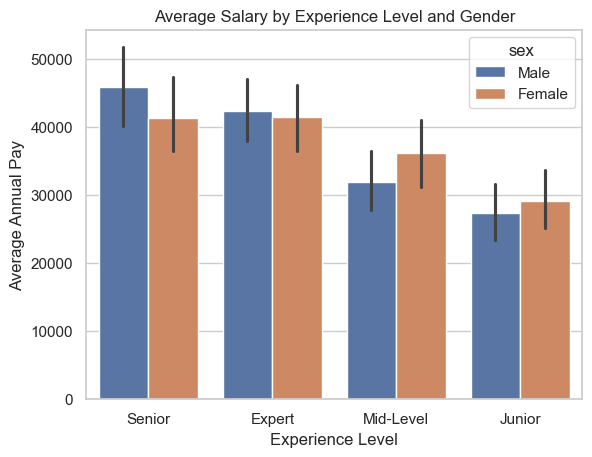

In [66]:

# Sort experience_level by overall average pay
experience_order = df.groupby('experience_level')['pay_annual'].mean().sort_values(ascending=False).index

# Barplot with gender as hue
sns. barplot(
    x="experience_level",
    y="pay_annual",
    hue="sex",
    data=df,
    order=experience_order
)

plt.title("Average Salary by Experience Level and Gender")
plt.xlabel("Experience Level")
plt.ylabel("Average Annual Pay")
plt.show()

In [68]:
df['region'].unique()

array(['Scotland', 'North East', 'West Midlands', 'Northern Ireland',
       'North West', 'South West', 'South East', 'East Midlands', 'Wales',
       'London'], dtype=object)

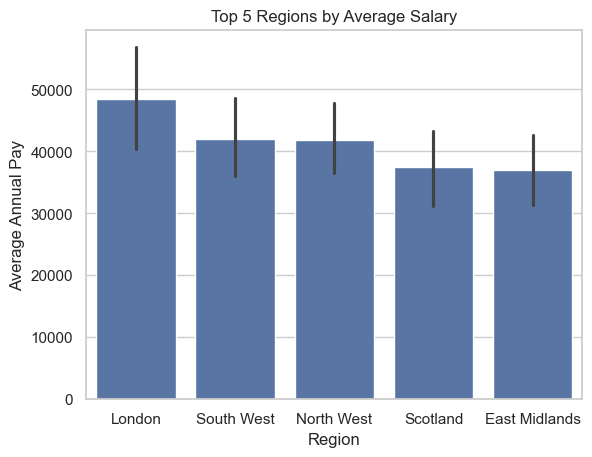

In [71]:
# Sort regions by average pay and take top 5
regional_order = df.groupby('region')['pay_annual'].mean().sort_values(ascending=False).head(5).index

# Plot top 5 regions
sns. barplot(
    x="region", 
    y="pay_annual", 
    data=df,
    order=regional_order  # top 5 regions
)

plt.title("Top 5 Regions by Average Salary")
plt.xlabel("Region")
plt.ylabel("Average Annual Pay")
plt.show()

In [79]:
df.head()
df['sector']. unique()

array(['Public Sector', 'Education', 'Retail', 'Construction',
       'Technology', 'Health', 'Finance', 'Manufacturing'], dtype=object)

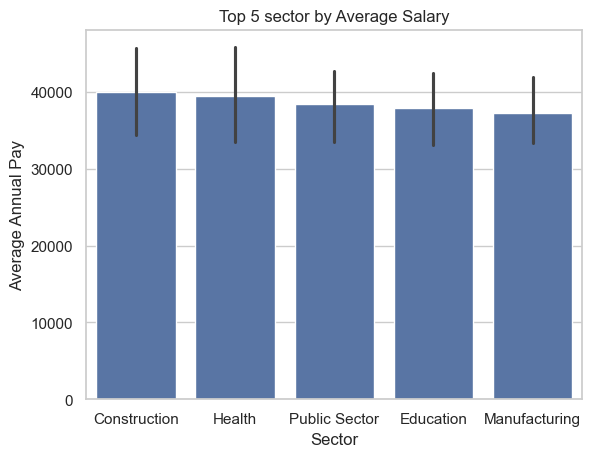

In [78]:
# Sort regions by average pay and take top 5
sector_order = df.groupby('sector')['pay_annual'].mean().sort_values(ascending=False).head(5).index

# Plot top 5 regions
sns. barplot(
    x="sector", 
    y="pay_annual", 
    data=df,
    order=sector_order  # top 5 regions
)

plt.title("Top 5 sector by Average Salary")
plt.xlabel("Sector")
plt.ylabel("Average Annual Pay")
plt.show()

# Connect to PostgreSQL

In [72]:
import psycopg2
import pandas as pd
import io

# Your existing DataFrame
# df = <your dataframe>

# ------------------------------------
# 1. Connect using psycopg2 (works)
# ------------------------------------
conn = psycopg2.connect(
    host="127.0.0.1",
    port=5432,
    user="postgres",
    password="##########",
    dbname="UK_Salary"
)
cur = conn.cursor()

table_name = "uk_salary"

# ------------------------------------
# 2. Drop table if exists
# ------------------------------------
cur.execute(f"DROP TABLE IF EXISTS {table_name};")

# ------------------------------------
# 3. Create table automatically from df
# ------------------------------------
cols = ", ".join([f'"{col}" TEXT' for col in df.columns])
cur.execute(f"CREATE TABLE {table_name} ({cols});")

# ------------------------------------
# 4. Copy DataFrame into PostgreSQL
# ------------------------------------
buffer = io.StringIO()
df.to_csv(buffer, index=False, header=False)
buffer.seek(0)

cur.copy_expert(
    f"COPY {table_name} FROM STDIN WITH CSV",
    buffer
)

conn.commit()
cur.close()
conn.close()

print("🚀 Data successfully loaded into PostgreSQL using psycopg2!")

🚀 Data successfully loaded into PostgreSQL using psycopg2!
